<a href="https://colab.research.google.com/github/hemajanjirala/Coderscave-project/blob/main/A%20Study%20of%20Temperature%20Variations%20Over%20Consecutive%20Days%20at%20Specified%20Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kaggle

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pickle as p
import numpy as np
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [ ]:
import pandas as pd

# URL of the Kaggle dataset
url = 'https://www.kaggle.com/datasets/die9origephit/temperature-data-albany-new-york'

In [ ]:
!kaggle datasets download - ""C:\Users\Dell\Downloads\archive (15).zip"

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `kaggle datasets download - ""C:\Users\Dell\Downloads\archive (15).zip"'


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  archive (15).zip
  inflating: daily_data.csv          
  inflating: hourly_data.csv         
  inflating: monthly_data.csv        
  inflating: three_hour_data.csv     


In [ ]:
import os

# List all files in the current directory
files = os.listdir()

# Print the list of files
print("List of datasets:")
for file in files:
    if file.endswith(".csv"):
        print(file)

List of datasets:
three_hour_data.csv
hourly_data.csv
monthly_data.csv
daily_data.csv


The following values can be encountered:
s = suspect value (appears together with value).
T = trace precipitation amount or snow depth (an amount too small to measure, usually < 0.005 inches water
equivalent) (appears instead of numeric value).
M = missing value (appears instead of value).
VRB = variable wind direction.


In [ ]:
df = pd.read_csv("../content/daily_data.csv")
df

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
0,72518014735,2015-01-01T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0,2006-09-08
1,72518014735,2015-01-02T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,250.0,30.0,T,0.0,T,310.0,23.0,726.0,1633.0,2006-09-08
2,72518014735,2015-01-03T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0,2006-09-08
3,72518014735,2015-01-04T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0,2006-09-08
4,72518014735,2015-01-05T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,280.0,42.0,T,0.0,T,290.0,32.0,726.0,1636.0,2006-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,72518014735,2022-05-27T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,160.0,28.0,0.00,0,0.0,160.0,21.0,423.0,1922.0,2006-09-08
2664,72518014735,2022-05-28T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,310.0,26.0,0.04,0,0.0,310.0,22.0,422.0,1923.0,2006-09-08
2665,72518014735,2022-05-29T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,90.0,13.0,0.00,0,0.0,180.0,9.0,421.0,1924.0,2006-09-08
2666,72518014735,2022-05-30T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,200.0,15.0,0.00,0,0.0,190.0,12.0,421.0,1925.0,2006-09-08


In [ ]:
print(df.head()) # first 5 rows

print(df.tail()) # last 5 rows

print(df.sample(10)) # 10 random rows

       STATION                 DATE REPORT_TYPE  SOURCE  AWND BackupElements  \
0  72518014735  2015-01-31T23:59:00       SOM         6   8.9         PRECIP   
1  72518014735  2015-02-28T23:59:00       SOM         6   8.7         PRECIP   
2  72518014735  2015-03-31T23:59:00       SOM         6   9.4         PRECIP   
3  72518014735  2015-04-30T23:59:00       SOM         6   9.4         PRECIP   
4  72518014735  2015-05-31T23:59:00       SOM         6   8.3         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  ...  \
0              260         PLASTIC         42.6918        -73.83109  ...   
1              260         PLASTIC         42.6918        -73.83109  ...   
2              260         PLASTIC         42.6918        -73.83109  ...   
3              260         PLASTIC         42.6918        -73.83109  ...   
4              260         PLASTIC         42.6918        -73.83109  ...   

  MonthlyMeanTemperature  MonthlyMinSeaLevelPressureValue  \
0

In [ ]:


print("\nBasic Statistics:")
print(daily_data.describe())


Basic Statistics:
            STATION  SOURCE  BackupElevation  BackupLatitude  BackupLongitude  \
count  2.668000e+03  2668.0           2668.0     2668.000000      2668.000000   
mean   7.251801e+10     6.0            260.0       42.689750       -73.828268   
std    0.000000e+00     0.0              0.0        0.004187         0.005764   
min    7.251801e+10     6.0            260.0       42.681200       -73.831090   
25%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
50%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
75%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
max    7.251801e+10     6.0            260.0       42.691800       -73.816500   

       DailyAverageDewPointTemperature  DailyAverageDryBulbTemperature  \
count                      2668.000000                     2668.000000   
mean                         38.217766                       50.107571   
std                          

In [ ]:
Monthly Aggregation...

In [ ]:
import pandas as pd

daily_data = pd.read_csv('daily_data.csv', parse_dates=['DATE'], na_values=['s', 'T', 'M'])

daily_data['Month'] = daily_data['DATE'].dt.month

monthly_aggregations = daily_data.groupby('Month').agg({
    'DailyAverageDryBulbTemperature': 'mean',
    'DailyPrecipitation': 'sum'
})

print("Monthly Aggregations:")
print(monthly_aggregations)

Monthly Aggregations:
       DailyAverageDryBulbTemperature  DailyPrecipitation
Month                                                    
1                           25.202429               18.36
2                           29.705584               19.94
3                           36.434959               18.76
4                           47.587500               27.35
5                           60.750000               20.62
6                           68.545455               26.96
7                           73.830986               35.11
8                           72.060185               29.82
9                           64.980952               28.02
10                          53.101852               30.46
11                          40.162679               19.91
12                          32.410138               21.28


In [ ]:
Average Daily Temperature..

In [ ]:
# Example Pandas query
average_daily_temperature = daily_data.groupby('DATE')['DailyAverageDryBulbTemperature'].mean()

print("Average Daily Temperature:")
print(average_daily_temperature)

Average Daily Temperature:
DATE
2015-01-01 23:59:00    25.0
2015-01-02 23:59:00    32.0
2015-01-03 23:59:00    27.0
2015-01-04 23:59:00    39.0
2015-01-05 23:59:00    27.0
                       ... 
2022-05-27 23:59:00    70.0
2022-05-28 23:59:00    68.0
2022-05-29 23:59:00    66.0
2022-05-30 23:59:00    72.0
2022-05-31 23:59:00    79.0
Name: DailyAverageDryBulbTemperature, Length: 2668, dtype: float64


In [ ]:
Extreme Temperature Days..

In [ ]:
# Identify days with extreme temperatures (e.g., above 90°F)
extreme_temperature_days = daily_data[daily_data['DailyMaximumDryBulbTemperature'] > 90]

# Display information about extreme temperature days
print("Extreme Temperature Days:")
print(extreme_temperature_days[['DATE', 'DailyMaximumDryBulbTemperature']])

Extreme Temperature Days:
                    DATE  DailyMaximumDryBulbTemperature
171  2015-07-19 23:59:00                            91.0
180  2015-07-28 23:59:00                            93.0
181  2015-07-29 23:59:00                            95.0
200  2015-08-18 23:59:00                            91.0
220  2015-09-07 23:59:00                            92.0
...                  ...                             ...
1986 2020-07-19 23:59:00                            93.0
1994 2020-07-27 23:59:00                            93.0
2331 2021-06-29 23:59:00                            92.0
2657 2022-05-21 23:59:00                            91.0
2667 2022-05-31 23:59:00                            92.0

[61 rows x 2 columns]


In [ ]:
Data Visualization Before Merging all datasets......

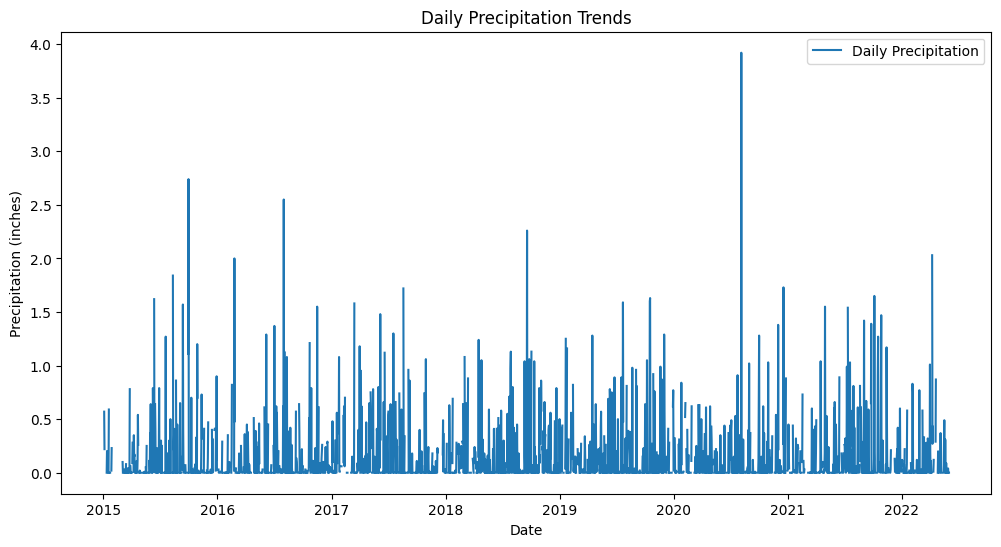

In [ ]:
import matplotlib.pyplot as plt

# Visualize precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyPrecipitation'], label='Daily Precipitation')
plt.title('Daily Precipitation Trends')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.show()

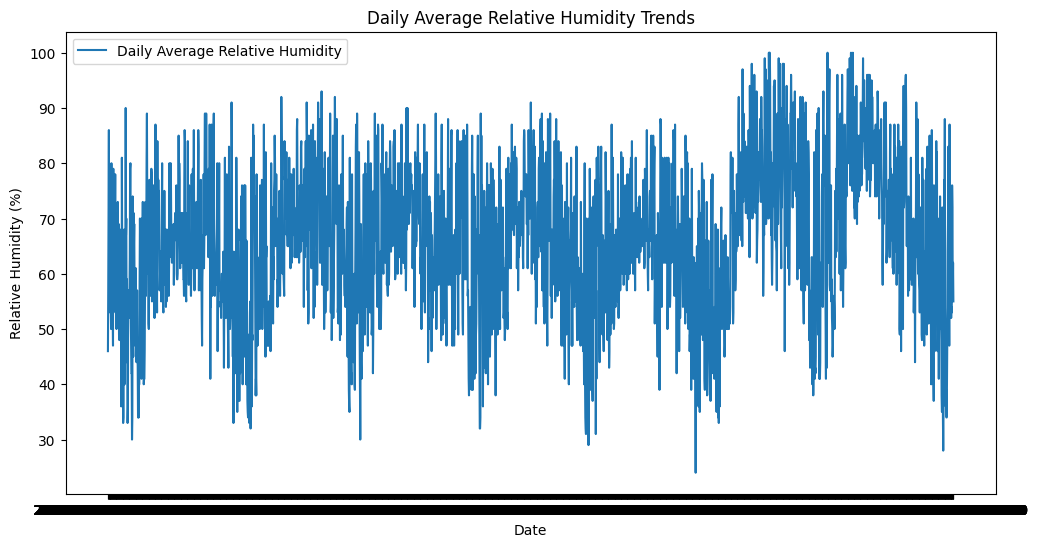

In [ ]:
# Visualize humidity over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageRelativeHumidity'], label='Daily Average Relative Humidity')
plt.title('Daily Average Relative Humidity Trends')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()

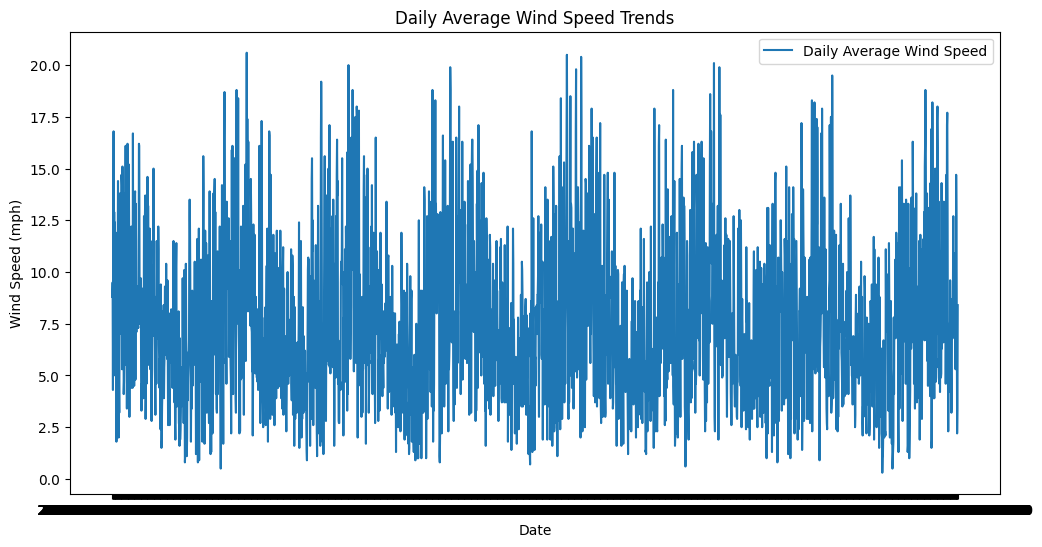

In [ ]:
# Visualize wind speed over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageWindSpeed'], label='Daily Average Wind Speed')
plt.title('Daily Average Wind Speed Trends')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.show()

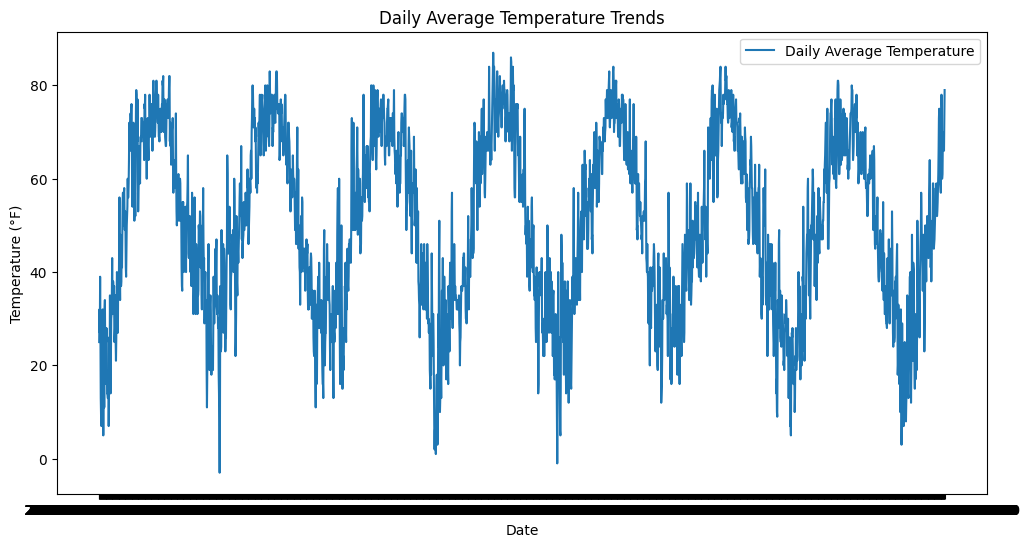

In [ ]:
# Visualize trends over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageDryBulbTemperature'], label='Daily Average Temperature')
plt.title('Daily Average Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

In [ ]:
Distribution of Wind Directions..

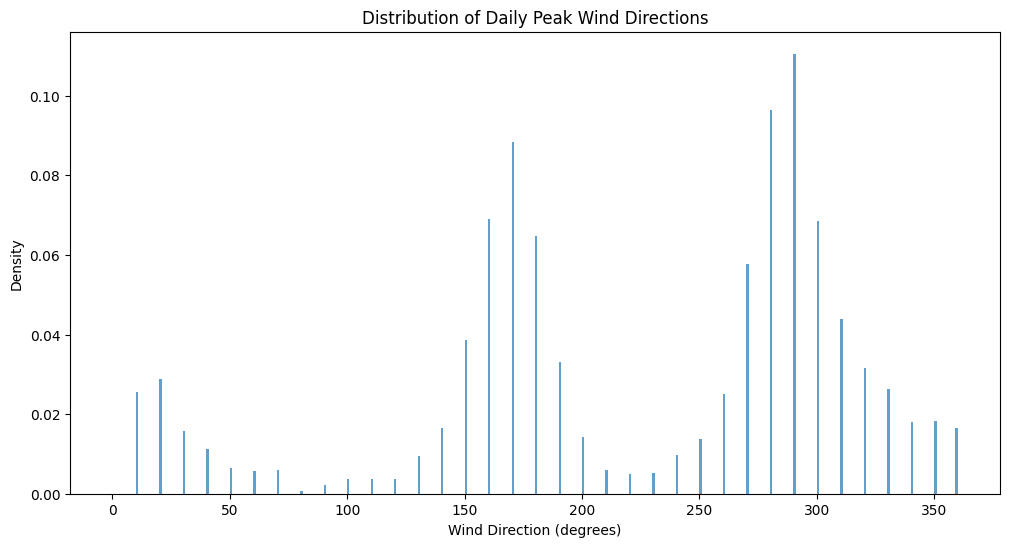

In [ ]:
# Visualize distribution of wind directions
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyPeakWindDirection'].dropna(), bins=360, range=(0, 360), density=True, alpha=0.7)
plt.title('Distribution of Daily Peak Wind Directions')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Density')
plt.show()

In [ ]:
Distribution of Daily Precipitation.

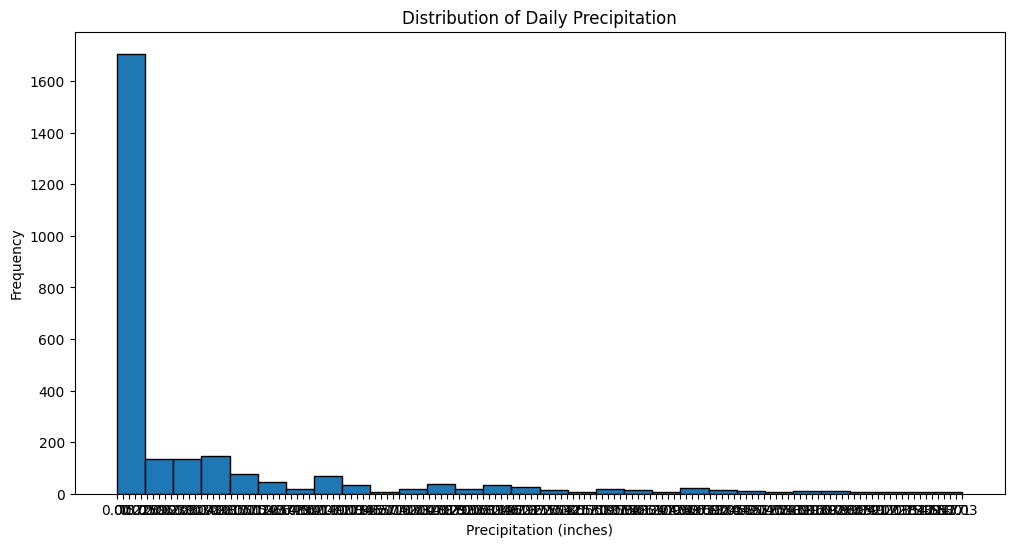

In [ ]:
# Visualize the distribution of daily precipitation
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyPrecipitation'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Montly Average temperature..

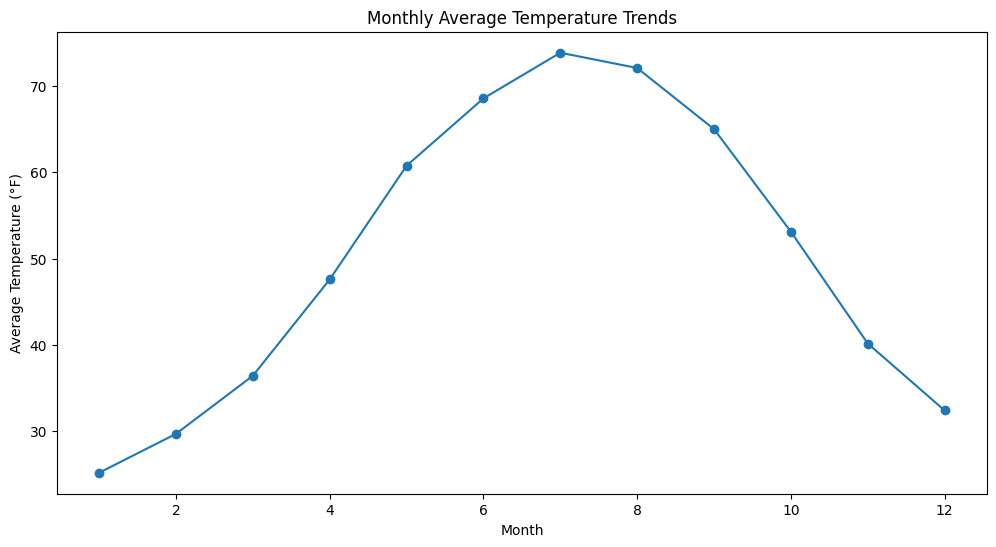

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new column for the month
daily_data['Month'] = daily_data['DATE'].dt.month

# Calculate average temperature per month
monthly_temperature = daily_data.groupby('Month')['DailyAverageDryBulbTemperature'].mean()

# Visualize trends in monthly average temperature
plt.figure(figsize=(12, 6))
plt.plot(monthly_temperature.index, monthly_temperature.values, marker='o')
plt.title('Monthly Average Temperature Trends')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.show()

In [ ]:
Distribution of daily average wind speed..

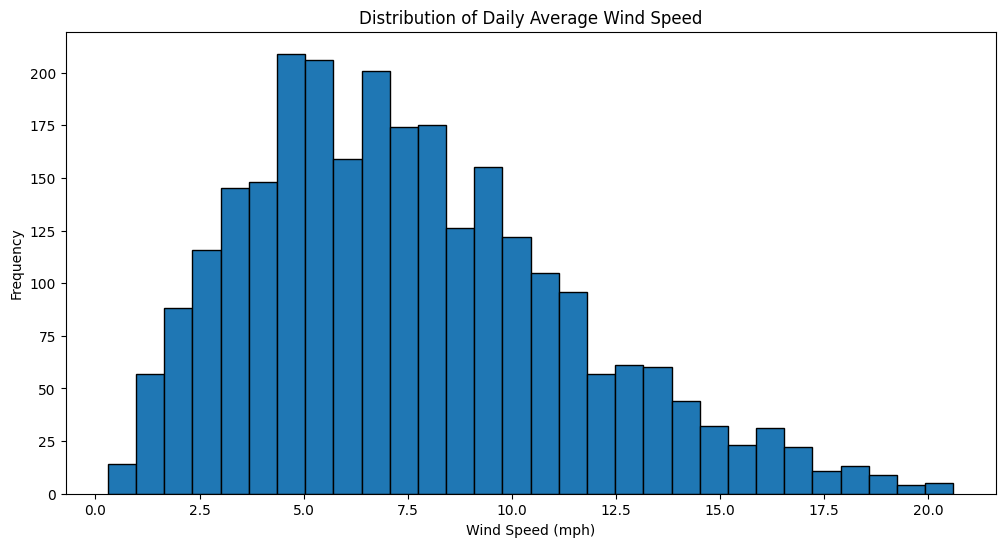

In [ ]:
# Visualize the distribution of daily average wind speed
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyAverageWindSpeed'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Average Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Daily Temperature Range.

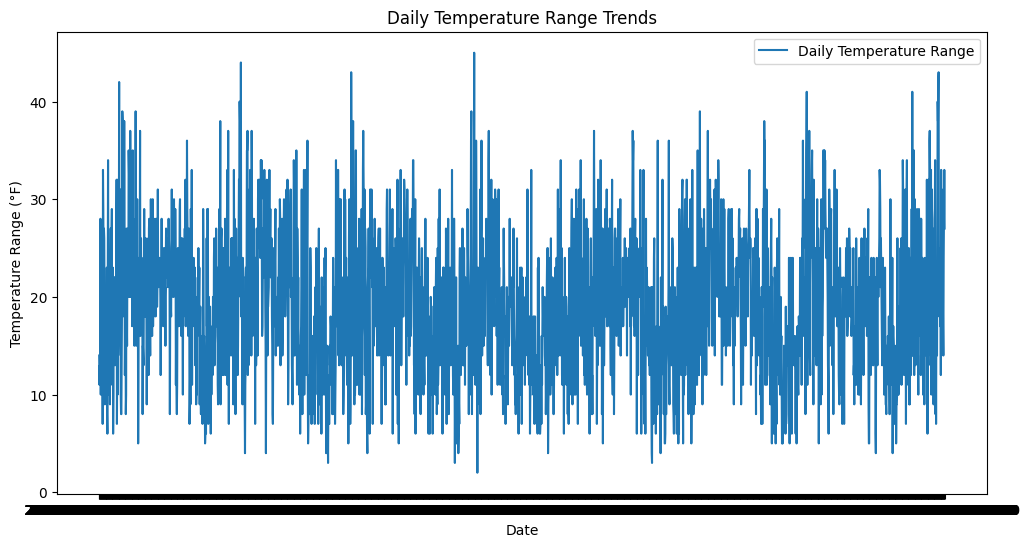

In [ ]:
# Calculate daily temperature range
daily_data['TemperatureRange'] = daily_data['DailyMaximumDryBulbTemperature'] - daily_data['DailyMinimumDryBulbTemperature']

# Visualize trends in daily temperature range
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['TemperatureRange'], label='Daily Temperature Range')
plt.title('Daily Temperature Range Trends')
plt.xlabel('Date')
plt.ylabel('Temperature Range (°F)')
plt.legend()
plt.show()

In [ ]:
Seasonal Average Temperature..

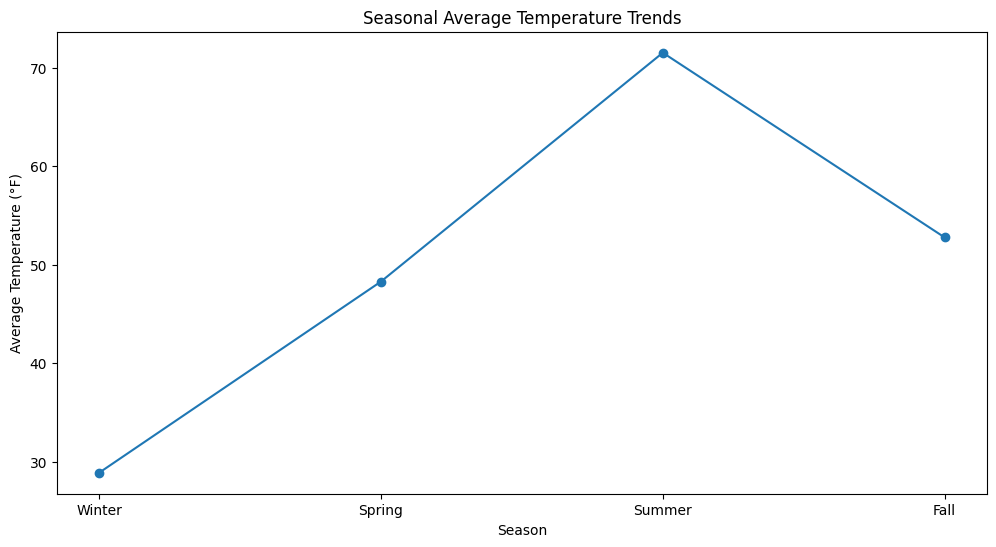

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract season from date
daily_data['Season'] = (daily_data['DATE'].dt.month % 12 + 3) // 3

# Calculate average temp per season
seasonal_temp = daily_data.groupby('Season')['DailyAverageDryBulbTemperature'].mean()

# Visualize seasonal temperature trends
plt.figure(figsize=(12, 6))
plt.plot(seasonal_temp.index, seasonal_temp.values, marker='o')
plt.title('Seasonal Average Temperature Trends')
plt.xlabel('Season')
plt.ylabel('Average Temperature (°F)')
plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

In [ ]:
Daily Snowfall

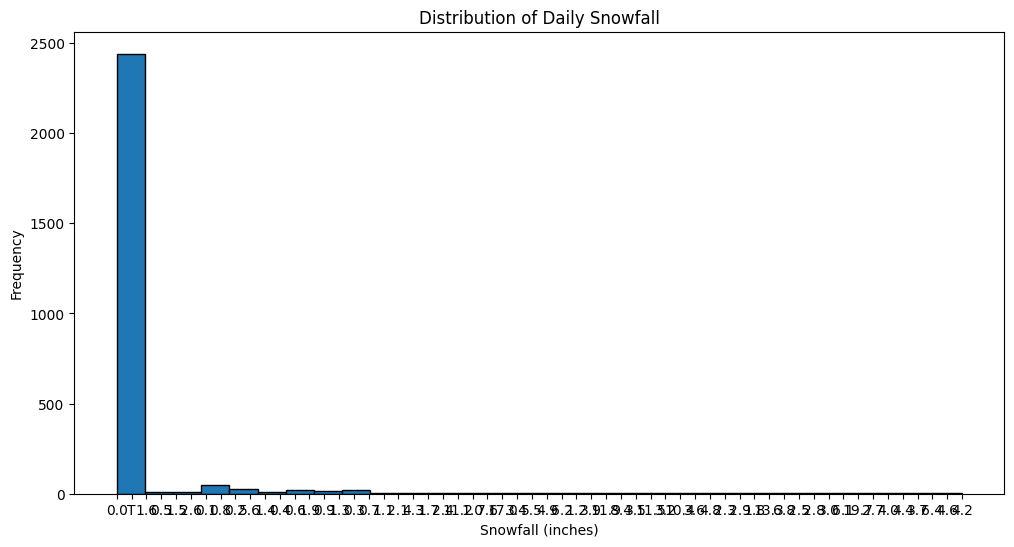

In [ ]:
# Visualize the distribution of daily snowfall
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailySnowfall'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Snowfall')
plt.xlabel('Snowfall (inches)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Average Monthly Wind Speed.

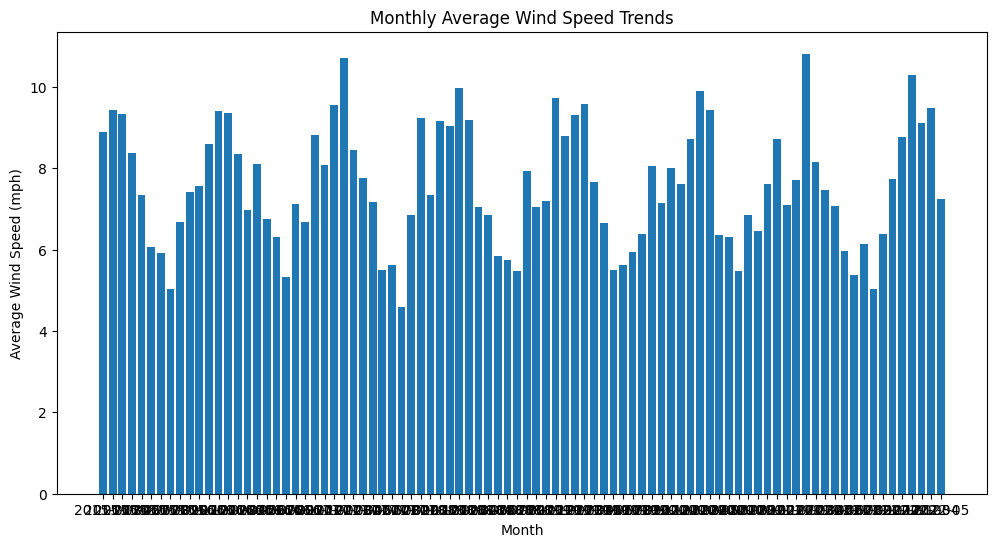

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate average monthly wind speed
monthly_wind_speed = daily_data.groupby(daily_data['DATE'].dt.to_period('M'))['DailyAverageWindSpeed'].mean()

# Visualize trends in monthly average wind speed
plt.figure(figsize=(12, 6))
plt.bar(monthly_wind_speed.index.astype(str), monthly_wind_speed.values)
plt.title('Monthly Average Wind Speed Trends')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (mph)')
plt.show()

In [ ]:
Montly Precipitation

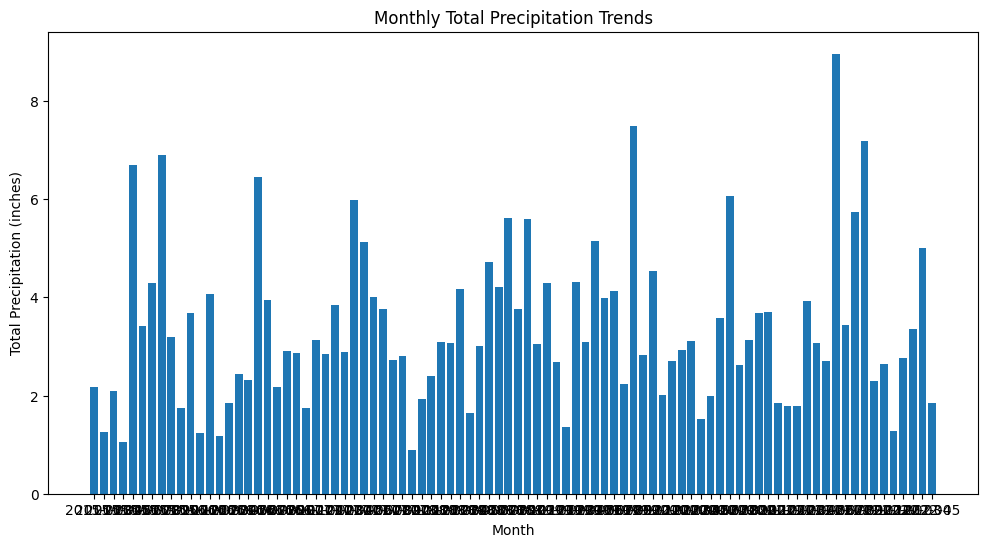

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total monthly precipitation
monthly_precipitation = daily_data.groupby(daily_data['DATE'].dt.to_period('M'))['DailyPrecipitation'].sum()

# Visualize monthly precipitation trends
plt.figure(figsize=(12, 6))
plt.bar(monthly_precipitation.index.astype(str), monthly_precipitation.values)
plt.title('Monthly Total Precipitation Trends')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (inches)')
plt.show()

In [ ]:
Daily precipitation VS Daily Average Temperature

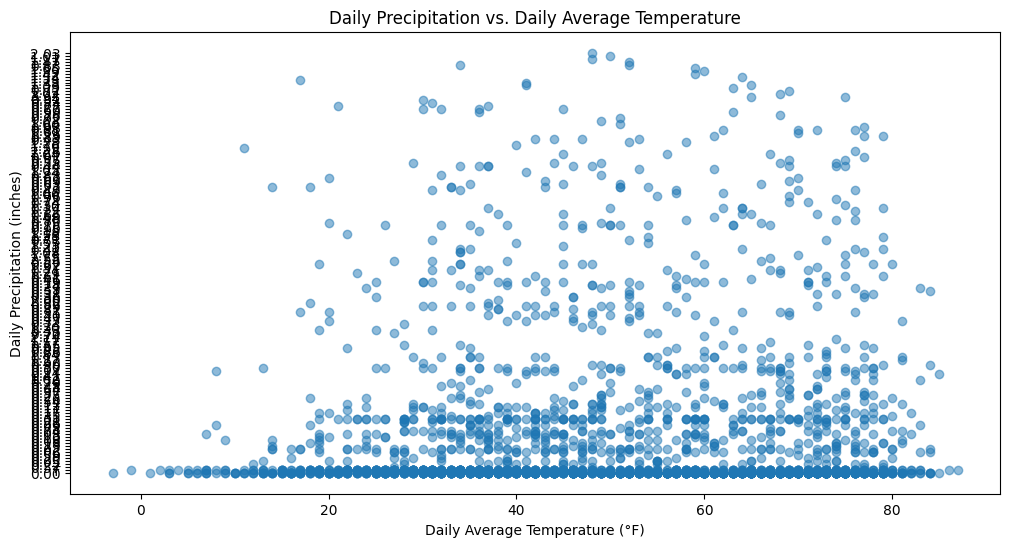

In [ ]:
# Scatter plot of daily precipitation vs. daily average temperature
plt.figure(figsize=(12, 6))
plt.scatter(daily_data['DailyAverageDryBulbTemperature'], daily_data['DailyPrecipitation'], alpha=0.5)
plt.title('Daily Precipitation vs. Daily Average Temperature')
plt.xlabel('Daily Average Temperature (°F)')
plt.ylabel('Daily Precipitation (inches)')
plt.show()

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("../content/monthly_data.csv")
df

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,...,MonthlyMeanTemperature,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,NormalsHeatingDegreeDay,WindEquipmentChangeDate
0,72518014735,2015-01-31T23:59:00,SOM,6,8.9,PRECIP,260,PLASTIC,42.6918,-73.83109,...,19.7,29.32,24.0,1707.0,10.5,30.11,29.77,2.17,1316.0,2006-09-08
1,72518014735,2015-02-28T23:59:00,SOM,6,8.7,PRECIP,260,PLASTIC,42.6918,-73.83109,...,12.7,29.56,15.0,151.0,2.4,30.09,29.75,2.15,1093.0,2006-09-08
2,72518014735,2015-03-31T23:59:00,SOM,6,9.4,PRECIP,260,PLASTIC,42.6918,-73.83109,...,29.8,29.56,17.0,1251.0,20.7,30.10,29.76,1.25,929.0,2006-09-08
3,72518014735,2015-04-30T23:59:00,SOM,6,9.4,PRECIP,260,PLASTIC,42.6918,-73.83109,...,47.8,29.54,21.0,451.0,36.9,29.98,29.66,2.10,520.0,2006-09-08
4,72518014735,2015-05-31T23:59:00,SOM,6,8.3,PRECIP,260,PLASTIC,42.6918,-73.83109,...,65.6,29.71,12.0,1251.0,52.8,30.09,29.77,1.05,235.0,2006-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,72518014735,2022-01-31T23:59:00,SOM,6,8.7,PRECIP,260,PLASTIC,42.6812,-73.81650,...,19.7,28.98,17.0,1351.0,10.5,30.08,29.75,1.28,1316.0,2006-09-08
83,72518014735,2022-02-28T23:59:00,SOM,6,10.3,PRECIP,260,PLASTIC,42.6812,-73.81650,...,27.5,29.16,18.0,451.0,17.3,30.17,29.85,2.77,1093.0,2006-09-08
84,72518014735,2022-03-31T23:59:00,SOM,6,9.2,PRECIP,260,PLASTIC,42.6812,-73.81650,...,37.3,29.34,7.0,1951.0,27.4,29.98,29.33,3.35,929.0,2006-09-08
85,72518014735,2022-04-30T23:59:00,SOM,6,9.6,PRECIP,260,PLASTIC,42.6812,-73.81650,...,47.8,29.49,1.0,151.0,37.3,29.98,29.66,5.00,520.0,2006-09-08


In [ ]:
1. Between ¶
It's a function that returns numerical values within a defined range.
The parameter `inclusive` can include 4 values: `both`, `neither`, `left`, `right`. This means you can choose whether or not you want to include the left (minimum) and right (maximum) thresholds in the range, only the left value or the right one.
Below, you can see an example:

In [ ]:
import pandas as pd

# Read in data
df = pd.read_csv("monthly_data.csv")

# Filter between 20.5 and 31
filtered_df = df[df['MonthlyMeanTemperature'].between(20.5, 31, inclusive='neither')]

# Print filtered DataFrame
print(filtered_df)

        STATION                 DATE REPORT_TYPE  SOURCE  AWND BackupElements  \
2   72518014735  2015-03-31T23:59:00       SOM         6   9.4         PRECIP   
12  72518014735  2016-01-31T23:59:00       SOM         6   8.7         PRECIP   
13  72518014735  2016-02-29T23:59:00       SOM         6   9.4         PRECIP   
23  72518014735  2016-12-31T23:59:00       SOM         6   8.7         PRECIP   
24  72518014735  2017-01-31T23:59:00       SOM         6   8.1         PRECIP   
35  72518014735  2017-12-31T23:59:00       SOM         6   7.4         PRECIP   
36  72518014735  2018-01-31T23:59:00       SOM         6   9.2         PRECIP   
48  72518014735  2019-01-31T23:59:00       SOM         6   9.6         PRECIP   
49  72518014735  2019-02-28T23:59:00       SOM         6   8.7         PRECIP   
57  72518014735  2019-12-31T23:59:00       SOM         6   7.2         PRECIP   
69  72518014735  2020-12-31T23:59:00       SOM         6   8.7         PRECIP   
70  72518014735  2021-01-31T

In [ ]:
2. Explode
To explain this function, we will create an array:

In [ ]:
Series=pd.Series([0,1,2,3,[4,5,6],7,[8,9,10]]).to_frame('Series_of_number')
Series

,Series_of_number
0,0
1,1
2,2
3,3
4,"[4, 5, 6]"
5,7
6,"[8, 9, 10]"


In [ ]:
#Set ignore_index to True to keep the ordering of a numeric index.
Series.explode('Series_of_number', ignore_index=False).As you can see, inside the column there are some lists that we want to transpose to different successive rows. Hence, the `explode` function takes a cell with an array-like value and *explodes* it into multiple rows.


,Series_of_number
0,0
1,1
2,2
3,3
4,4
4,5
4,6
5,7
6,8
6,9


In [ ]:
3. Pd.options
Pandas has global settings you can call with the `pd.options` API, and you can tweak them to change the default behaviors. These settings are divided into 5 modules:

In [ ]:
dir(pd.options)

['compute', 'display', 'io', 'mode', 'plotting', 'styler']

DataFrame or a Series, and the consecutive one, displays the `max_rows` value previously defined.

In [ ]:
pd.options.display.max_rows = 4 # pd.options.display.max_rows = 10 for columns

pd.get_option("display.max_rows")

4

The next two respectively reset the maximum rows re-establishing the default value, and display the default max_rows value.

In [ ]:
pd.reset_option("display.max_rows")

pd.get_option("display.max_rows")

60

In [ ]:
4. Select_dtypes
It selects columns, including or excluding certain data types.
In this example, we choose only numeric columns with `np.number` data types:

In [ ]:


numeric_cols = df.select_dtypes(include=['number']).columns

print(df[numeric_cols].head())

       STATION  SOURCE  AWND  BackupElevation  BackupLatitude  \
0  72518014735       6   8.9              260         42.6918   
1  72518014735       6   8.7              260         42.6918   
2  72518014735       6   9.4              260         42.6918   
3  72518014735       6   9.4              260         42.6918   
4  72518014735       6   8.3              260         42.6918   

   BackupLongitude   CDSD   CLDD  DSNW    HDSD  ...  \
0        -73.83109    0.0    0.0   5.0  3694.0  ...   
1        -73.83109    0.0    0.0   5.0  5154.0  ...   
2        -73.83109    0.0    0.0   2.0  6241.0  ...   
3        -73.83109    0.0    0.0   0.0  6757.0  ...   
4        -73.83109  118.0  118.0   0.0  6858.0  ...   

   MonthlyMaximumTemperature  MonthlyMeanTemperature  \
0                       28.9                    19.7   
1                       23.0                    12.7   
2                       39.0                    29.8   
3                       58.7                    47.8  

In [ ]:


non_numeric_cols = df.select_dtypes(exclude=['number']).columns

print(df[non_numeric_cols].head())

                  DATE REPORT_TYPE BackupElements BackupEquipment  \
0  2015-01-31T23:59:00       SOM           PRECIP         PLASTIC   
1  2015-02-28T23:59:00       SOM           PRECIP         PLASTIC   
2  2015-03-31T23:59:00       SOM           PRECIP         PLASTIC   
3  2015-04-30T23:59:00       SOM           PRECIP         PLASTIC   
4  2015-05-31T23:59:00       SOM           PRECIP         PLASTIC   

       BackupName MonthlyGreatestPrecipDate MonthlyGreatestSnowDepth  \
0  NWS ALBANY, NY                     03-04                      6.0   
1  NWS ALBANY, NY                     02-02                     17.0   
2  NWS ALBANY, NY                     26-26                     13.0   
3  NWS ALBANY, NY                     20-21                      0.0   
4  NWS ALBANY, NY                     30-31                      0.0   

  MonthlyGreatestSnowfall WindEquipmentChangeDate  
0                     5.6              2006-09-08  
1                    11.9              2006-09-0

In [ ]:
5. Clip
`Clip` function makes it easy to find outliers outside a defined range, and it replaces them with a value:

In [ ]:


df['MonthlyMinSeaLevelPressureValueTime'] = df['MonthlyMinSeaLevelPressureValueTime'].clip(lower=400, upper=1700)

print(df['MonthlyMinSeaLevelPressureValueTime'])

0     1700.0
1      400.0
2     1251.0
3      451.0
4     1251.0
       ...  
82    1351.0
83     451.0
84    1700.0
85     400.0
86    1516.0
Name: MonthlyMinSeaLevelPressureValueTime, Length: 87, dtype: float64


In [ ]:
6. Hasnans
It quickly checks if a given series contains null values, yielding a boolean value:

In [ ]:


has_nans = df['MonthlyMinSeaLevelPressureValueTime'].hasnans

print(has_nans)

False


In [ ]:
7. Groupby.nth
After creating a GroupBy object, `nth` returns the nth row from each group:

In [ ]:


grouped = df.groupby('AWND')

result = grouped.nth(4)

print(result)

          STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
AWND                                                                        
6.7   72518014735  2019-06-30T23:59:00       SOM         6         PRECIP   
6.9   72518014735  2020-09-30T23:59:00       SOM         6         PRECIP   
7.2   72518014735  2021-01-31T23:59:00       SOM         6         PRECIP   
7.6   72518014735  2021-02-28T23:59:00       SOM         6         PRECIP   
8.1   72518014735  2020-01-31T23:59:00       SOM         6         PRECIP   
8.7   72518014735  2020-03-31T23:59:00       SOM         6         PRECIP   
9.2   72518014735  2022-03-31T23:59:00       SOM         6         PRECIP   
9.4   72518014735  2017-02-28T23:59:00       SOM         6         PRECIP   

      BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
AWND                                                                     
6.7               260         PLASTIC         42.6918        -73.83109   
6.9    

In [ ]:
8. Value_counts

In [ ]:
# we create a series of numbers
Series=pd.Series([None,2,1,1,3,6,2,4,2,2,2,3,1,None,None])

#we find the percentage of missing values and all the other values
Series.value_counts(dropna=False, normalize=True)

#dropna=False shows the Null values
#normalize=True gives all the percentages

2.0    0.333333
NaN    0.200000
1.0    0.200000
3.0    0.133333
6.0    0.066667
4.0    0.066667
dtype: float64

In [ ]:
9. Nlargest and Nsmallest
It shows the largest or smallest N values of a variable.
Let’s check the top 5 highest and lowest monthly mean temperatures:

In [ ]:


largest = df.nlargest(5, 'MonthlyMeanTemperature')

print(largest)

        STATION                 DATE REPORT_TYPE  SOURCE  AWND BackupElements  \
42  72518014735  2018-07-31T23:59:00       SOM         6   5.8         PRECIP   
64  72518014735  2020-07-31T23:59:00       SOM         6   6.3         PRECIP   
43  72518014735  2018-08-31T23:59:00       SOM         6   5.8         PRECIP   
18  72518014735  2016-07-31T23:59:00       SOM         6   6.7         PRECIP   
19  72518014735  2016-08-31T23:59:00       SOM         6   6.3         PRECIP   

    BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  ...  \
42              260         PLASTIC         42.6918        -73.83109  ...   
64              260         PLASTIC         42.6918        -73.83109  ...   
43              260         PLASTIC         42.6918        -73.83109  ...   
18              260         PLASTIC         42.6918        -73.83109  ...   
19              260         PLASTIC         42.6918        -73.83109  ...   

   MonthlyMeanTemperature  MonthlyMinSeaLevelPress

In [ ]:


smallest = df.nsmallest(5, 'MonthlyMeanTemperature')

print(smallest)


        STATION                 DATE REPORT_TYPE  SOURCE  AWND BackupElements  \
1   72518014735  2015-02-28T23:59:00       SOM         6   8.7         PRECIP   
0   72518014735  2015-01-31T23:59:00       SOM         6   8.9         PRECIP   
82  72518014735  2022-01-31T23:59:00       SOM         6   8.7         PRECIP   
36  72518014735  2018-01-31T23:59:00       SOM         6   9.2         PRECIP   
48  72518014735  2019-01-31T23:59:00       SOM         6   9.6         PRECIP   

    BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  ...  \
1               260         PLASTIC         42.6918        -73.83109  ...   
0               260         PLASTIC         42.6918        -73.83109  ...   
82              260         PLASTIC         42.6812        -73.81650  ...   
36              260         PLASTIC         42.6918        -73.83109  ...   
48              260         PLASTIC         42.6918        -73.83109  ...   

   MonthlyMeanTemperature  MonthlyMinSeaLevelPress

10. Mask
It allows you to replace values where a given condition is true.
In the next example, suppose to treat monthly pressures outside the 29 and 29.75 bars range as data entry mistakes, thus replacing them with missing values.
We can see that there are 3 values which fall outside the range.

In [ ]:


masked = df["MonthlyStationPressure"].mask(
    cond=~df["MonthlyStationPressure"].between(29.0, 29.75),
    other=np.nan
)

print(masked.to_frame())

    MonthlyStationPressure
0                      NaN
1                    29.75
2                      NaN
3                    29.66
4                      NaN
..                     ...
82                   29.75
83                     NaN
84                   29.33
85                   29.66
86                   29.72

[87 rows x 1 columns]


Conclusions
There are plenty of Pandas functions which allow you to optimize your data analysis projects. It's important to assimilate them, applying these functions to some datasets. In my profile, you can find a vast array of datasets where you can perform data analysis, visualization and machine/deep learning techniques.

In [ ]:
df = pd.read_csv("../content/hourly_data.csv")
df

<ipython-input-23-d0d6043c5a9c>:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../content/hourly_data.csv")


,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,WindEquipmentChangeDate
0,72518014735,2015-01-01T00:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,22,0,46,30.05,29.72,10.0,18,150,10,9/8/2006
1,72518014735,2015-01-01T01:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,22,0,48,30.04,29.71,10.0,18,170,8,9/8/2006
2,72518014735,2015-01-01T02:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,20,0,52,30.03,29.7,10.0,16,180,6,9/8/2006
3,72518014735,2015-01-01T03:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,19,0,57,30.03,29.7,10.0,16,190,7,9/8/2006
4,72518014735,2015-01-01T04:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,21,0,52,30.04,29.71,10.0,17,170,8,9/8/2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64724,72518014735,2022-05-31T19:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,76,0,62,29.91,29.61,10.0,67,360,10,9/8/2006
64725,72518014735,2022-05-31T20:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,73,0,62,29.93,29.62,10.0,64,360,9,9/8/2006
64726,72518014735,2022-05-31T21:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,70,0,66,29.94,29.64,10.0,63,350,7,9/8/2006
64727,72518014735,2022-05-31T22:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,68,0,68,29.94,29.64,10.0,62,340,8,9/8/2006


In [ ]:
print(df.head()) # first 5 rows

print(df.tail()) # last 5 rows

print(df.sample(10)) # 10 random rows

       STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0  72518014735  2015-01-01T00:51:00       FM-15       7         PRECIP   
1  72518014735  2015-01-01T01:51:00       FM-15       7         PRECIP   
2  72518014735  2015-01-01T02:51:00       FM-15       7         PRECIP   
3  72518014735  2015-01-01T03:51:00       FM-15       7         PRECIP   
4  72518014735  2015-01-01T04:51:00       FM-15       7         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ... HourlyDryBulbTemperature HourlyPrecipitation  \
0  NWS ALBANY, NY  ...                       22          

In [ ]:
import pandas as pd

daily_data = pd.read_csv('daily_data.csv', parse_dates=['DATE'], na_values=['s', 'T', 'M'])

# Extract hour from date
daily_data['Hour'] = daily_data['DATE'].dt.hour

# Aggregate by hour
hourly_aggregations = daily_data.groupby('Hour').agg({
    'DailyAverageDryBulbTemperature': 'mean',
    'DailyPrecipitation':'sum'
})

print("Hourly Aggregations:")
print(hourly_aggregations)

Hourly Aggregations:
      DailyAverageDryBulbTemperature  DailyPrecipitation
Hour                                                    
23                         50.107571              296.59


In [ ]:
df = pd.read_csv("../content/three_hour_data.csv")
df

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,WindEquipmentChangeDate
0,72518014735,2015-01-01T01:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.09,8,46,30.05,29.72,9.94,18,150,10,9/8/2006
1,72518014735,2015-01-01T04:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.02,6,57,30.03,29.7,9.94,16,190,7,9/8/2006
2,72518014735,2015-01-01T07:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,-0.02,1,52,30.05,29.72,9.94,17,160,9,9/8/2006
3,72518014735,2015-01-01T10:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,-0.01,3,44,30.06,29.72,9.94,21,180,11,9/8/2006
4,72518014735,2015-01-01T13:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.11,8,38,29.95,29.62,9.94,23,170,15,9/8/2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20838,72518014735,2022-05-31T10:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,0.03,8,45,29.94,29.63,9.94,71,280,13,9/8/2006
20839,72518014735,2022-05-31T13:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,0.04,6,38,29.9,29.59,9.94,73,280,8,9/8/2006
20840,72518014735,2022-05-31T16:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,0.03,6,37,29.87,29.57,9.94,71,250,18,9/8/2006
20841,72518014735,2022-05-31T19:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,-0.01,3,42,29.88,29.57,9.94,69,260,11,9/8/2006


In [ ]:
print(df.head()) # first 5 rows

print(df.tail()) # last 5 rows

print(df.sample(10)) # 10 random rows

       STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0  72518014735  2015-01-01T01:00:00       FM-12       4         PRECIP   
1  72518014735  2015-01-01T04:00:00       FM-12       4         PRECIP   
2  72518014735  2015-01-01T07:00:00       FM-12       4         PRECIP   
3  72518014735  2015-01-01T10:00:00       FM-12       4         PRECIP   
4  72518014735  2015-01-01T13:00:00       FM-12       4         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ... HourlyPressureChange HourlyPressureTendency  \
0  NWS ALBANY, NY  ...                 0.09               

In [ ]:
Merging

In [ ]:
import pandas as pd

# Load datasets
daily_data = pd.read_csv("../content/daily_data.csv", na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
hourly_data = pd.read_csv("../content/hourly_data.csv", na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
monthly_data = pd.read_csv("../content/monthly_data.csv", na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
three_hour_data = pd.read_csv("../content/three_hour_data.csv", na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])

# Identify common columns
common_columns = set.intersection(set(daily_data.columns), set(hourly_data.columns), set(monthly_data.columns), set(three_hour_data.columns))

# Print common columns
print("Common columns:", common_columns)

Common columns: {'BackupEquipment', 'DATE', 'BackupLongitude', 'BackupElements', 'WindEquipmentChangeDate', 'BackupElevation', 'STATION', 'BackupName', 'REPORT_TYPE', 'BackupLatitude', 'SOURCE'}


<ipython-input-35-fccef4cb7ca9>:5: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data = pd.read_csv("../content/hourly_data.csv", na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])


In [ ]:
import pandas as pd


# Load datasets
daily_data = pd.read_csv("../content/daily_data.csv", na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
hourly_data = pd.read_csv("../content/hourly_data.csv", na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
monthly_data = pd.read_csv("../content/monthly_data.csv", na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
three_hour_data = pd.read_csv("../content/three_hour_data.csv", na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])

# Merge datasets on 'DATE' column
merged_data = pd.merge(daily_data, hourly_data, on='DATE', how='outer', suffixes=('_daily', '_hourly'))
merged_data = pd.merge(merged_data, monthly_data, on='DATE', how='outer', suffixes=('_merged', '_monthly'))
merged_data = pd.merge(merged_data, three_hour_data, on='DATE', how='outer', suffixes=('_merged','_three_hour'))

# Print merged data
print("Merged Dataset:")
print(merged_data.head())

# Identify mixed type columns in hourly_data
mixed_cols = hourly_data.iloc[:, [11,12]].columns

# Print columns and their dtypes
print("Columns with mixed types:")
print(mixed_cols)
print("\nData types:")
print(hourly_data[mixed_cols].dtypes)

<ipython-input-36-0ada4bd3ca0a>:6: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data = pd.read_csv("../content/hourly_data.csv", na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])


Merged Dataset:
   STATION_daily                 DATE  REPORT_TYPE_daily  SOURCE_daily  \
0   7.251801e+10  2015-01-01T23:59:00                NaN           6.0   
1   7.251801e+10  2015-01-02T23:59:00                NaN           6.0   
2   7.251801e+10  2015-01-03T23:59:00                NaN           6.0   
3   7.251801e+10  2015-01-04T23:59:00                NaN           6.0   
4   7.251801e+10  2015-01-05T23:59:00                NaN           6.0   

   BackupElements_daily  BackupElevation_daily BackupEquipment_daily  \
0                   NaN                  260.0               PLASTIC   
1                   NaN                  260.0               PLASTIC   
2                   NaN                  260.0               PLASTIC   
3                   NaN                  260.0               PLASTIC   
4                   NaN                  260.0               PLASTIC   

   BackupLatitude_daily  BackupLongitude_daily BackupName_daily  ...  \
0               42.6918           

In [ ]:
Datatypes of Columns..

In [ ]:
import pandas as pd

# Load hourly data
hourly_data = pd.read_csv("../content/hourly_data.csv")

# Identify columns with mixed types
mixed_cols = hourly_data.iloc[:, [11,12]].columns
print("Columns with mixed types in hourly_data:", mixed_cols)

# Print data types
print("\nData types of columns with mixed types:")
print(hourly_data[mixed_cols].dtypes)

Columns with mixed types in hourly_data: Index(['HourlyDewPointTemperature', 'HourlyDryBulbTemperature'], dtype='object')

Data types of columns with mixed types:
HourlyDewPointTemperature    object
HourlyDryBulbTemperature     object
dtype: object


<ipython-input-39-33d1731a7283>:4: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data = pd.read_csv("../content/hourly_data.csv")


In [ ]:
After Merging. Check for Missing Values..

In [ ]:
# Check for missing values
missing_values = merged_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
STATION_daily                          85575
DATE                                       0
REPORT_TYPE_daily                      88243
SOURCE_daily                           85575
BackupElements_daily                   88243
                                       ...  
HourlyVisibility_three_hour            67400
HourlyWetBulbTemperature_three_hour    67400
HourlyWindDirection_three_hour         67400
HourlyWindSpeed_three_hour             67400
WindEquipmentChangeDate_three_hour     67400
Length: 119, dtype: int64


In [ ]:
Summary Statistics...

In [ ]:
# Summary statistics
summary_stats = merged_data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       STATION_daily  REPORT_TYPE_daily  SOURCE_daily  BackupElements_daily  \
count   2.668000e+03                0.0        2668.0                   0.0   
mean    7.251801e+10                NaN           6.0                   NaN   
std     0.000000e+00                NaN           0.0                   NaN   
min     7.251801e+10                NaN           6.0                   NaN   
25%     7.251801e+10                NaN           6.0                   NaN   
50%     7.251801e+10                NaN           6.0                   NaN   
75%     7.251801e+10                NaN           6.0                   NaN   
max     7.251801e+10                NaN           6.0                   NaN   

       BackupElevation_daily  BackupLatitude_daily  BackupLongitude_daily  \
count                 2668.0           2668.000000            2668.000000   
mean                   260.0             42.689750             -73.828268   
std                      0.0         

In [ ]:
Data Visuals.. Daily Average Temperature over time.

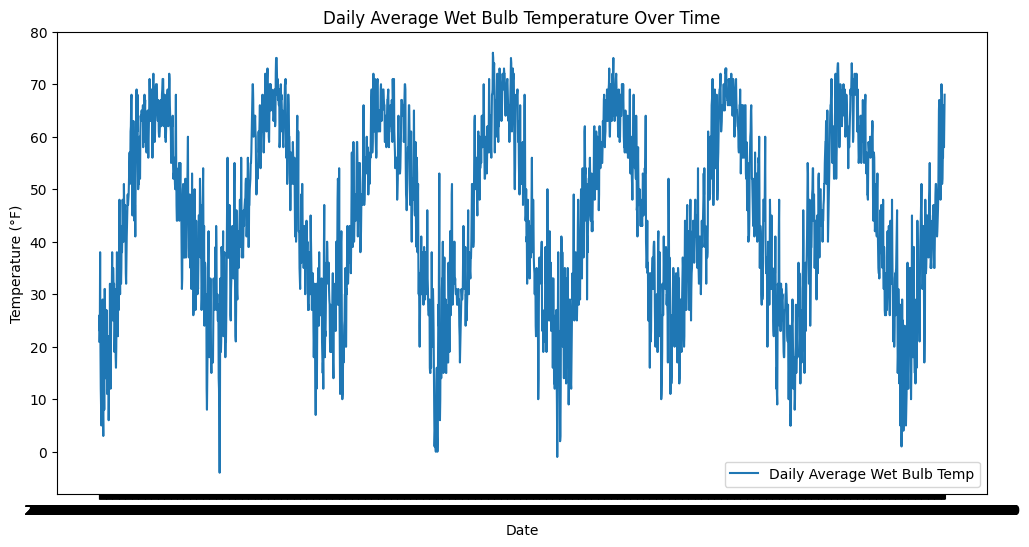

In [ ]:
import matplotlib.pyplot as plt

# Plot daily average wet bulb temperature
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageWetBulbTemperature'], label='Daily Average Wet Bulb Temp')

plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Daily Average Wet Bulb Temperature Over Time')

plt.legend()
plt.show()

In [ ]:
Time Series of Daily Average Temperature.

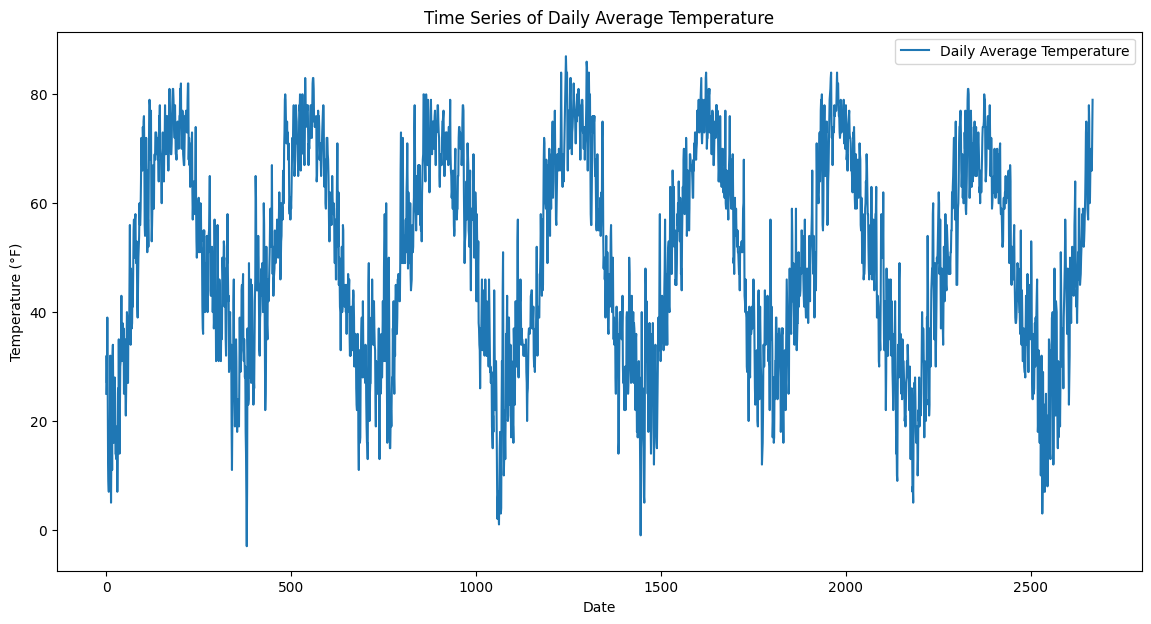

In [ ]:
# Assuming you have loaded the merged_data DataFrame

# Plot the time series of daily average temperature
plt.figure(figsize=(14, 7))
plt.plot(merged_data.index, merged_data['DailyAverageDryBulbTemperature'], label='Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Time Series of Daily Average Temperature')
plt.legend()
plt.show()

In [ ]:
Distribution of Wind

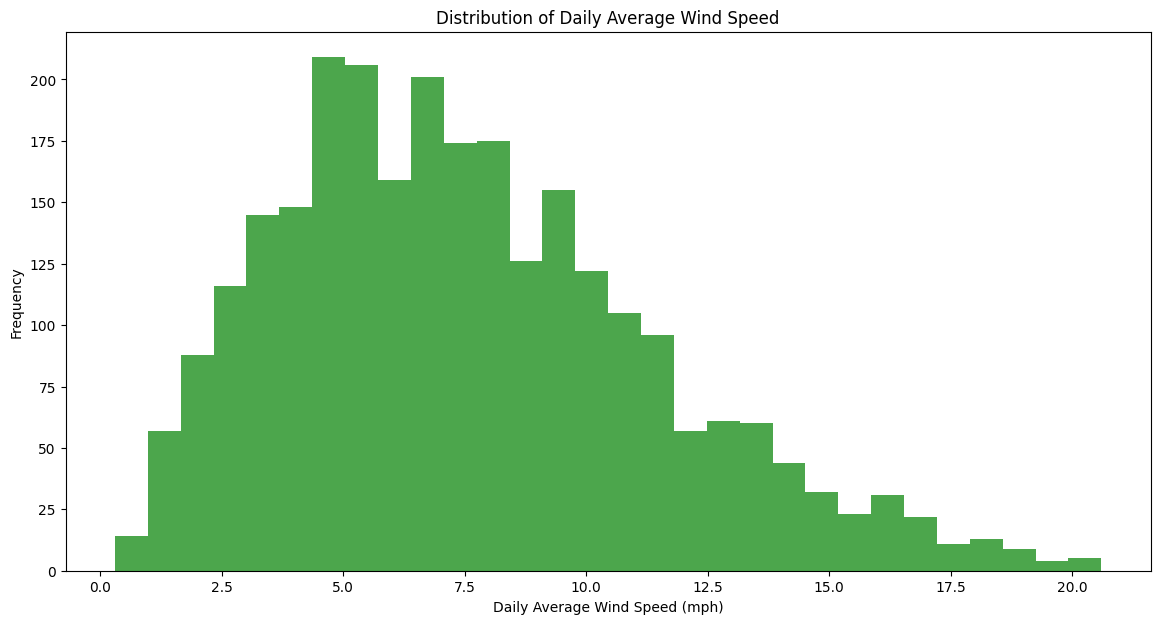

In [ ]:
# Analyze and visualize the distribution of wind speed
plt.figure(figsize=(14, 7))
plt.hist(merged_data['DailyAverageWindSpeed'], bins=30, color='green', alpha=0.7)
plt.xlabel('Daily Average Wind Speed (mph)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Average Wind Speed')
plt.show()

In [ ]:
Prevailing Direction..

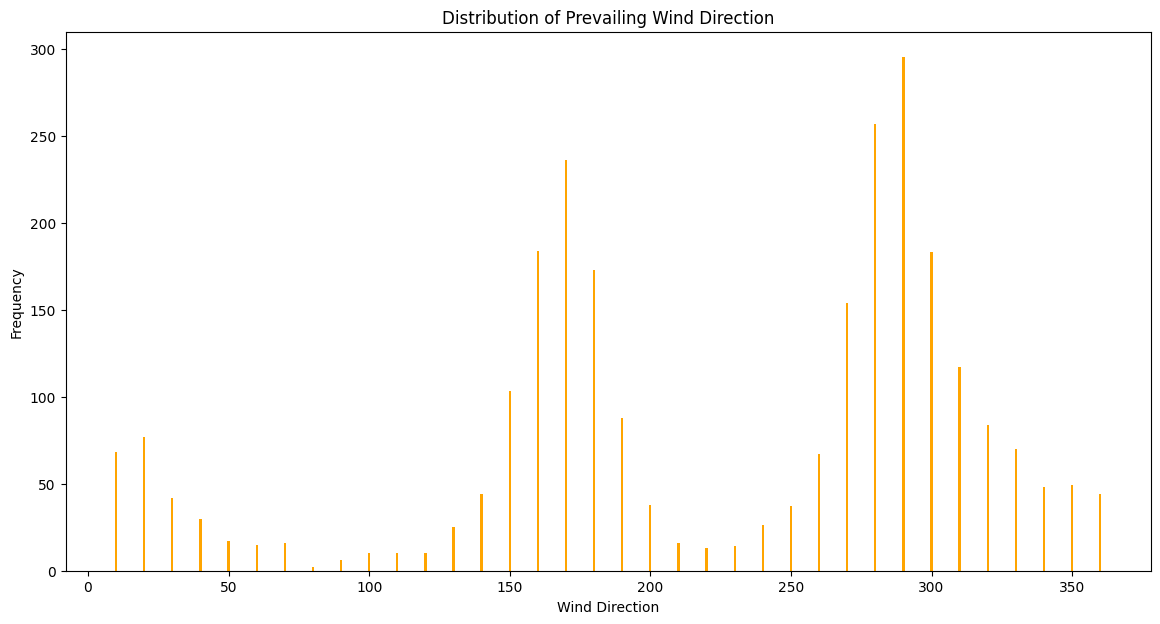

In [ ]:
# Identify and visualize the prevailing wind direction
plt.figure(figsize=(14, 7))
plt.bar(merged_data['DailyPeakWindDirection'].value_counts().index, merged_data['DailyPeakWindDirection'].value_counts().values, color='orange')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.title('Distribution of Prevailing Wind Direction')
plt.show()

In [ ]:
Distribution Of weather sources..

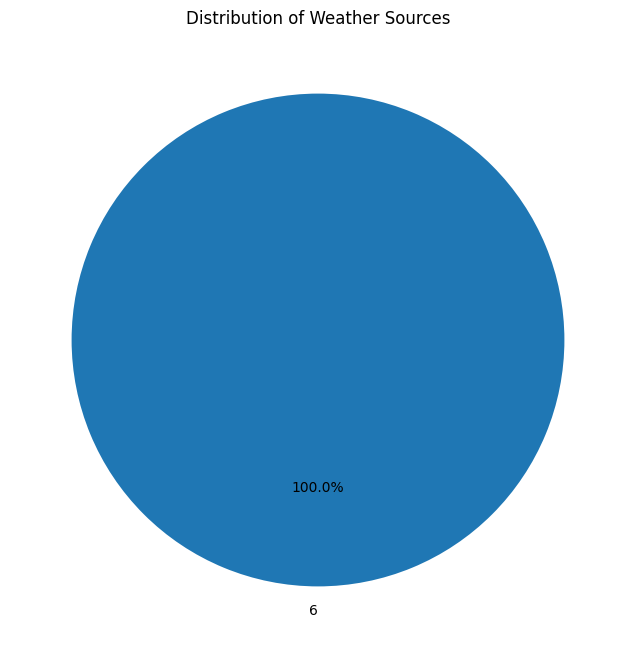

In [ ]:
source_distribution = daily_data['SOURCE'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(source_distribution, labels=source_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Weather Sources')
plt.show()